This dataset is about the Medicare Part D Opioid Prescriber Summary File, which presents information on the individual opioid prescribing rates of health providers that participate in Medicare Part D program

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("./datasets/Medicare_Part_D_Opioid_Prescriber_Summary_File_2017.csv")

In [8]:
df.head()

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
0,1174649131,MORAN,LAUREN,2478.0,MA,Psychiatry,27,0.0,0.0,0.0,NaN
1,1003804923,KASTENDIECK,KURT,87505.0,NM,Family Practice,5342,593.0,11.1,72.0,12.14
2,1366761108,WILEY,JULIE,73102.0,OK,Obstetrics & Gynecology,125,NaN,NaN,0.0,NaN
3,1386611234,GUNNELL,JENNIFER,97701.0,OR,Internal Medicine,250,NaN,NaN,0.0,NaN
4,1871920066,COX,SUSAN,89502.0,NV,Nurse Practitioner,717,0.0,0.0,0.0,NaN


Let's check the null values in our dataset

In [9]:
df.columns

Index(['NPI', 'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate', 'Long-Acting Opioid Claim Count',
       'Long-Acting Opioid Prescribing Rate'],
      dtype='object')

In [10]:
# Renaming the column names

df=df.rename(columns={'NPPES Provider Last Name':'last_name', 'NPPES Provider First Name':'first_name',
                     'NPPES Provider ZIP Code':'ZIP_code','NPPES Provider State':'state',
                     })

In [11]:
# Combining the first name and last name

df["Name"]=df["first_name"]+" "+df["last_name"]


In [12]:
df=df.drop(columns=["first_name","last_name"])

In [13]:
df.columns

Index(['NPI', 'ZIP_code', 'state', 'Specialty Description',
       'Total Claim Count', 'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Name'],
      dtype='object')

I am going to select only following columns

In [14]:
df=df[['NPI','Name', 'ZIP_code', 'state', 'Specialty Description',
       'Total Claim Count', 'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162898 entries, 0 to 1162897
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   NPI                                  1162898 non-null  int64  
 1   Name                                 1162842 non-null  object 
 2   ZIP_code                             1162846 non-null  float64
 3   state                                1162898 non-null  object 
 4   Specialty Description                1162898 non-null  object 
 5   Total Claim Count                    1162898 non-null  int64  
 6   Opioid Claim Count                   834341 non-null   float64
 7   Opioid Prescribing Rate              834341 non-null   float64
 8   Long-Acting Opioid Claim Count       1017426 non-null  float64
 9   Long-Acting Opioid Prescribing Rate  374356 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 88.7+ MB


In [16]:
df.shape

(1162898, 10)

For categorical columns I am going to put Unknown as this is the real dataset so we can not put anything random

In [17]:
df.fillna({"Name":"Unknown",                         
"ZIP_code":"Unknown"},inplace=True)

For Numerical columns I am putting 0

In [18]:
df.fillna({"Opioid Claim Count":0,                     
"Opioid Prescribing Rate":0,                
"Long-Acting Opioid Claim Count":0,         
"Long-Acting Opioid Prescribing Rate":0},inplace=True)

Reason behind keeping all nulls:
    If I drop all nulls ,I will loose the fraud providers.As I checked there would remain only 173
    fraud provider.So I decided to impute.

In [19]:
df.isnull().sum()

NPI                                    0
Name                                   0
ZIP_code                               0
state                                  0
Specialty Description                  0
Total Claim Count                      0
Opioid Claim Count                     0
Opioid Prescribing Rate                0
Long-Acting Opioid Claim Count         0
Long-Acting Opioid Prescribing Rate    0
dtype: int64

From this dataset we are only taking following columns for further process.

In [20]:
df1=df[['NPI',"Opioid Claim Count",                     
"Opioid Prescribing Rate",                
"Long-Acting Opioid Claim Count",         
"Long-Acting Opioid Prescribing Rate"]]

In [21]:
df1.to_csv("./datasets/opiod.csv")

# EDA

In [22]:
df.head()

,NPI,Name,ZIP_code,state,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
0,1174649131,LAUREN MORAN,2478,MA,Psychiatry,27,0.0,0.0,0.0,0.00
1,1003804923,KURT KASTENDIECK,87505,NM,Family Practice,5342,593.0,11.1,72.0,12.14
2,1366761108,JULIE WILEY,73102,OK,Obstetrics & Gynecology,125,0.0,0.0,0.0,0.00
3,1386611234,JENNIFER GUNNELL,97701,OR,Internal Medicine,250,0.0,0.0,0.0,0.00
4,1871920066,SUSAN COX,89502,NV,Nurse Practitioner,717,0.0,0.0,0.0,0.00


Let's check the city whose providers has maximum claims

In [23]:
a=df.groupby("state")["Total Claim Count"].sum()
max_claims=a.sort_values(ascending=False).reset_index().head(15)

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


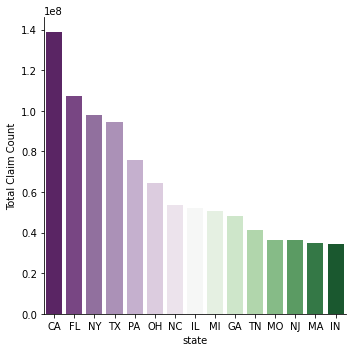

In [24]:
sns.catplot(x="state", y="Total Claim Count",kind="bar", data=max_claims, size=5,palette="PRGn")


In [25]:
min_claims=a.sort_values().reset_index().head(15)

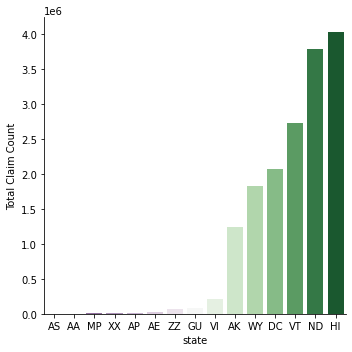

In [26]:
sns.catplot(x="state", y="Total Claim Count",kind="bar", data=min_claims, size=5,palette="PRGn")

In [27]:
df.groupby("Specialty Description")["Opioid Claim Count"].max()

Specialty Description
Acupuncturist                                        100.0
Addiction Medicine                                  4446.0
Adult Companion                                        0.0
Advanced Heart Failure and Transplant Cardiology       0.0
Advanced Practice Dental Therapist                     0.0
                                                     ...  
Unknown Supplier/Provider Specialty                   69.0
Urology                                             2407.0
Vascular Surgery                                    1163.0
Veterinarian                                           0.0
Voluntary Health or Charitable Agency                  0.0
Name: Opioid Claim Count, Length: 214, dtype: float64

Prescribing rate according to speciality of provider

In [28]:
prescribing_rate=df.groupby("Specialty Description")["Long-Acting Opioid Prescribing Rate"].sum()

In [29]:
prescribing_rate=prescribing_rate.sort_values(ascending=False).head(10).reset_index()
prescribing_rate

,Specialty Description,Long-Acting Opioid Prescribing Rate
0,Family Practice,528466.34
1,Internal Medicine,416850.44
2,Nurse Practitioner,340729.63
3,Physician Assistant,143810.59
4,Hematology-Oncology,138558.05
5,Physical Medicine and Rehabilitation,75425.85
6,Anesthesiology,67016.39
7,Pain Management,46723.56
8,Medical Oncology,45123.99
9,Neurology,44906.11


Here is the top 10 Speciality with highest opioid prescribing rate

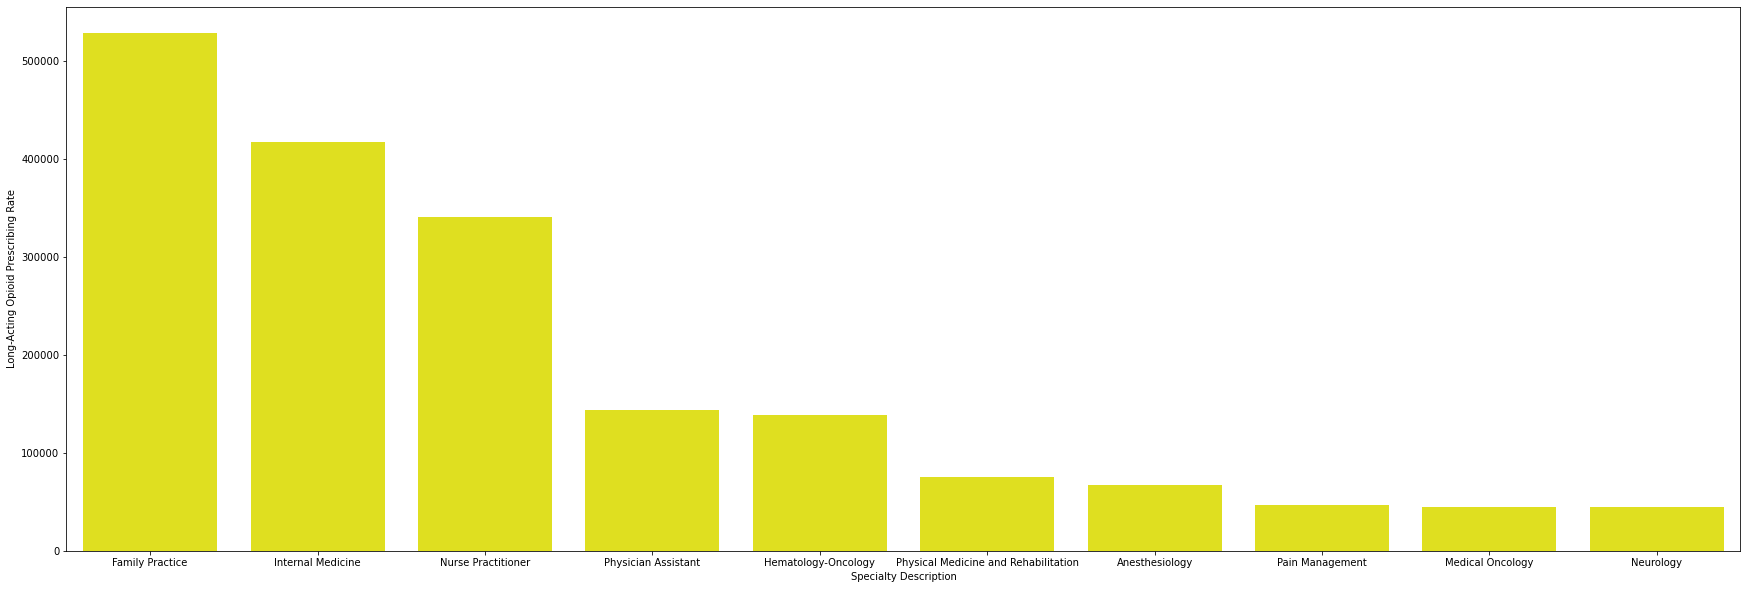

In [30]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='Specialty Description',y="Long-Acting Opioid Prescribing Rate",
            data=prescribing_rate,orient="v",ax=ax,color="yellow")

In [31]:
df.describe().round(2)

,NPI,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
count,1.162898e+06,1162898.00,1162898.00,1162898.00,1162898.00,1162898.00
mean,1.499872e+09,1284.99,64.04,7.22,7.83,1.82
std,2.879383e+08,3094.37,265.63,14.93,64.09,6.94
min,1.003000e+09,11.00,0.00,0.00,0.00,0.00
25%,1.245771e+09,55.00,0.00,0.00,0.00,0.00
50%,1.497974e+09,203.00,0.00,0.00,0.00,0.00
75%,1.740739e+09,995.00,35.00,5.95,0.00,0.00
max,1.993000e+09,447288.00,20599.00,100.00,6056.00,100.00


Get the data with Fraud providers

In [32]:
fraud_provider=pd.read_csv("./datasets/fraud.csv",index_col=0)

In [33]:
df2=df.merge(fraud_provider)

In [34]:
df2

,NPI,Name,ZIP_code,state,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,is_fraud
0,1669758959,PHOUNING KEO,85260,AZ,Nurse Practitioner,3464,65.0,1.88,0.0,0.00,1
1,1245350354,SPIRO KASSIS,19403,PA,Psychiatry & Neurology,798,0.0,0.00,0.0,0.00,1
2,1760553580,JOBIE CREAR,70125,LA,Ophthalmology,50,0.0,0.00,0.0,0.00,1
3,1013009729,HAILU KABTIMER,37075,TN,Internal Medicine,7243,417.0,5.76,23.0,5.52,1
4,1144212978,HARCHARAN NARANG,77429,TX,Internal Medicine,77,0.0,0.00,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
529,1891719621,ROBERT LOWENSTEIN,13501,NY,Family Medicine,39,0.0,0.00,0.0,0.00,1
530,1154471621,AZAD KHAN,19131,PA,Internal Medicine,198,0.0,0.00,0.0,0.00,1
531,1134280779,MICHAEL PENDLETON,78411,TX,Internal Medicine,4808,210.0,4.37,0.0,0.00,1
532,1962434027,STEVEN COX,36105,AL,Nurse Practitioner,2902,216.0,7.44,11.0,5.09,1


We can see that in our dataset there is 534 providers who are fraud

Lets check in which state there are more frauds

In [35]:
fraud_states=df2.groupby("state")["is_fraud"].sum()
fraud_states=fraud_states.reset_index().sort_values(by="is_fraud",ascending=False).head(20)

In [36]:
fraud_states

,state,is_fraud
31,NY,51
4,CA,46
8,FL,44
21,MI,35
41,TX,35
35,PA,29
28,NJ,23
13,IL,21
43,VA,21
9,GA,17


The above data is the fraudulent in perticular state.

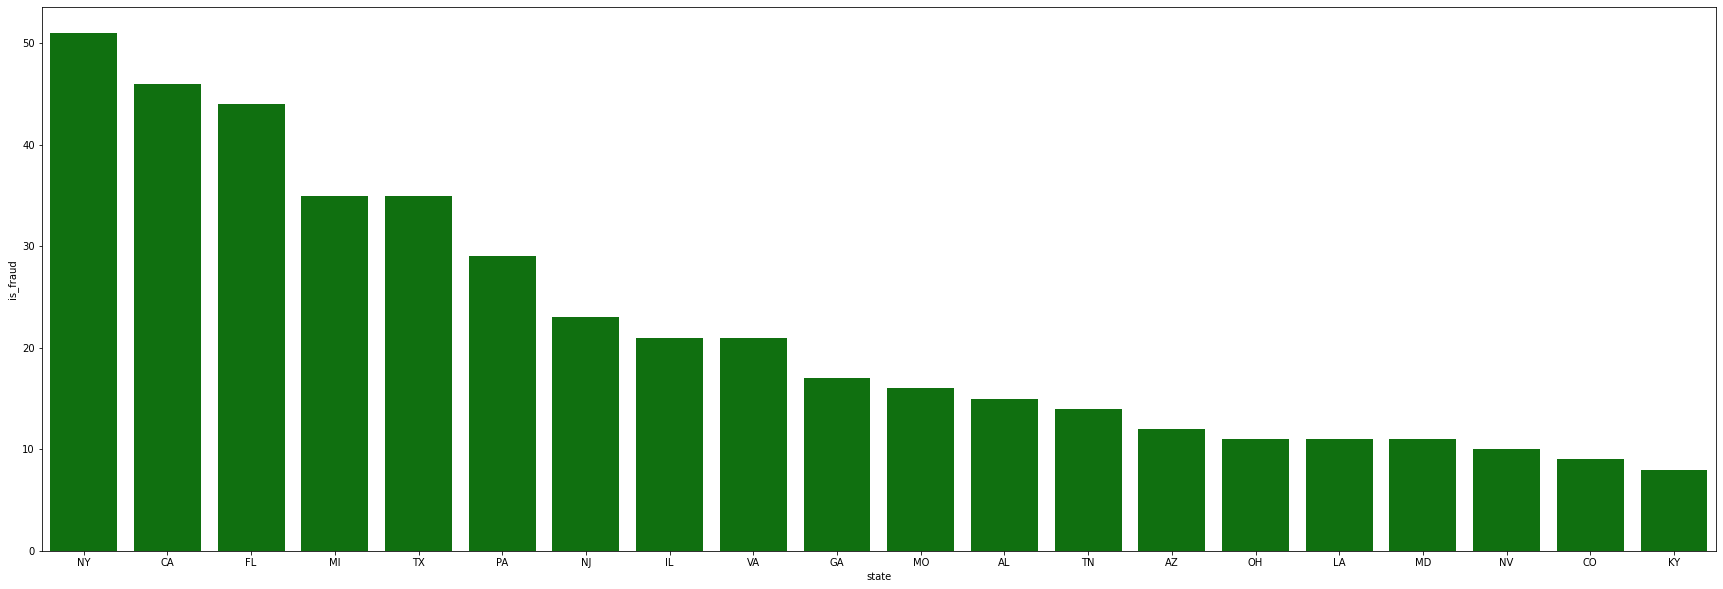

In [40]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='state',y="is_fraud",
            data=fraud_states,orient="v",ax=ax,color="green")

In the top 20 highest fraud provider based on the state Newyork is at the top with 51 frauds and Kentucky is at 20th position
with 8 frauds related to opioid drug prescription.